In [1]:
from time import sleep
from kafka import KafkaProducer, KafkaConsumer
import requests
import time
import threading
from json import loads, dumps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import geopandas as gpd

In [2]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))

In [3]:
def producerMethod():
    t_end = time.time() + 60 * 60
    while time.time() < t_end:
        res=requests.get('http://api.open-notify.org/iss-now.json').text
        producer.send('numtest', res)
        sleep(5)
x = threading.Thread(target=producerMethod)
x.start()

In [4]:
consumer = KafkaConsumer(
    'numtest',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',
    enable_auto_commit=True,
    group_id='my-group',
    consumer_timeout_ms = 10000,
    value_deserializer=lambda x: loads(x.decode('utf-8')))

In [5]:
lat_long = []
for message in consumer:
    data = loads(message.value)
    lat_long.append(data.get("iss_position"))
print("Process Completed")

Process Completed


In [6]:
df = pd.DataFrame(lat_long)
df=df.astype({'latitude':'float','longitude':'float'})

<IPython.core.display.Javascript object>


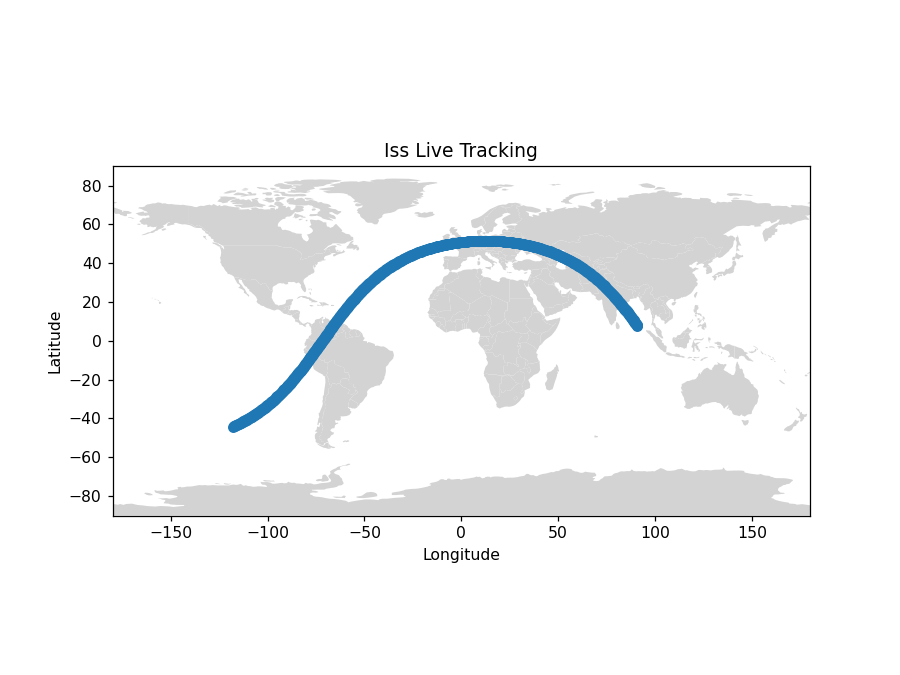

(-90.0, 90.0)

In [8]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(8, 6))
worldmap.plot(color="lightgrey", ax=ax)
x = df['longitude']
y = df['latitude']
plt.scatter(x, y)
plt.title("Iss Live Tracking")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([-180, 180])
plt.ylim([-90, 90])